In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
path = os.getcwd() + '/dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

## Ex 1

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## Ex 2

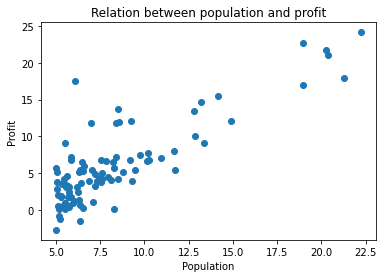

In [5]:
plt.scatter(data.Population, data.Profit)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Relation between population and profit')
plt.show()

## Ex 3

In [6]:
data.insert(loc=0, column='Cost', value=1, allow_duplicates=False)
data.head()

,Cost,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


## Ex 4

In [7]:
X = data.Population
X.head()

0    6.1101
1    5.5277
2    8.5186
3    7.0032
4    5.8598
Name: Population, dtype: float64

In [8]:
y = data.Profit
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

In [9]:
X = np.matrix(X.values, dtype=np.float64)
y = np.matrix(y.values, dtype=np.float64)
theta = np.matrix(np.array([0,0], dtype=np.float64), dtype=np.float64)

## Ex 6

In [10]:
def computeCost(X, y, theta):
    theta0 = theta[0, 0] 
    theta = theta[0, 1:] if theta[0, 1:].size != 1 else theta[0,0]
    cost = (1/(2*X.size))*np.sum(np.power( theta * X - y, 2))
    return cost

## Ex 7

In [11]:
computeCost(X, y, theta)

32.072733877455676

## Ex 8

In [12]:
alpha = 0.01
it = 1000

In [13]:
def gradientDescent (X, y, theta, alpha, iterations):
    theta0 = theta[0, 0]
    theta1 = theta[0, 1]
    cost = []
    for it in range(iterations):
        hypothesis = theta0 + np.dot(theta1, X)
        theta0 = theta0 - (1/y.size)*alpha*np.sum(hypothesis - y)
        theta1 = float(theta1 - (1/y.size)*alpha*np.sum(X[1:].dot(np.transpose(hypothesis - y))))
        theta = np.matrix(np.array([theta0, theta1]))
        cost.append(computeCost(X, y, theta)) 
    return theta, cost

In [14]:
def gradientDescent (X, y, theta, alpha, iterations):
    cost = []
    for it in range(iterations):
        hypothesis = theta[0,0] + theta[0, 1:].dot(X)
        theta[0, 0] = float(theta[0, 0] - alpha*(1/y.shape[1])*np.sum((hypothesis - y)))
        for i in range(theta[0, 1:].size):
            theta[0, i+1] = float(theta[0, i+1] - alpha*(1/y.shape[1])*np.sum((hypothesis - y).dot(np.transpose(X[i]))))
        cost.append(computeCost(X, y, theta))
    return theta, cost

In [15]:
theta_res = gradientDescent(X, y, theta, alpha, it)[0]
cost = gradientDescent(X, y, theta, alpha, it)[1]

## Ex 9 

In [16]:
gradientDescent(X, y, theta, alpha, it)[0]

matrix([[-3.87805118,  1.1912525 ]])

In [17]:
theta_res

matrix([[-3.87805118,  1.1912525 ]])

## Ex 10

In [19]:
cost[-1]

863.5943501056604

## Ex 11

In [20]:
#predicted values
predY = theta_res[0, 1:] * X + theta[0, 0]

In [21]:
# For plotting purposes only
X = np.squeeze(np.asarray(X))
y = np.squeeze(np.asarray(y))
predY = np.squeeze(np.asarray(predY))

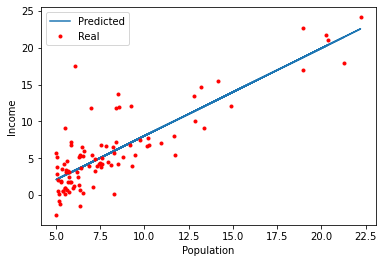

In [22]:
plt.plot(X, predY, X, y, 'r.')
plt.xlabel('Population')
plt.ylabel('Income')
plt.legend(['Predicted', 'Real'])
plt.show()

## Ex 12

In [23]:
iterations = range(it)
costVal = np.squeeze(np.asarray(cost))

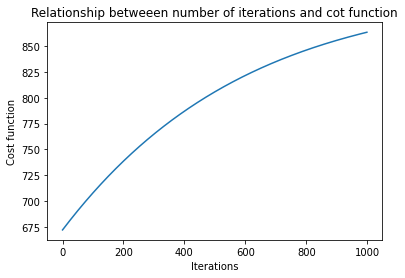

In [24]:
plt.plot(iterations, costVal)
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.title('Relationship betweeen number of iterations and cot function')
plt.show()